### <font color='red'> Project description:
  
- Source : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
  
  This dataset was created by IBM data scientists, to study the factors that lead to employee attrition. It has 1470 instances and 34 features, which includes 26 numerical and 8 categorical values. Target value is attrition which is a categorical variable taking value either 'Yes' or 'No. 


-   AGE=	                                  Numerical Value
-  ATTRITION=	                          Employee leaving the company (0=no, 1=yes)
- BUSINESS TRAVEL=	                      (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)
-    DAILY RATE	  =                        Numerical Value - Salary Level
-    DEPARTMENT	   =                       (1=HR, 2=R&D, 3=Sales)
-   DISTANCE FROM HOME=	                  Numerical Value - THE DISTANCE FROM WORK TO HOME
-   EDUCATION	       =                   Numerical Value
-   EDUCATION FIELD	    =                  (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)
-    EMPLOYEE COUNT	     =                 Numerical Value
-    EMPLOYEE NUMBER	  =                    Numerical Value - EMPLOYEE ID
-    ENVIROMENT SATISFACTION=	              Numerical Value - SATISFACTION WITH THE ENVIROMENT
-    GENDER	                 =             (1=FEMALE, 2=MALE)
-    HOURLY RATE	          =                Numerical Value - HOURLY SALARY
-    JOB INVOLVEMENT	       =               Numerical Value - JOB INVOLVEMENT
-    JOB LEVEL	                =          Numerical Value - LEVEL OF JOB
-    JOB ROLE	                 =         (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH                                           DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)
-    JOB SATISFACTION	 =                 Numerical Value - SATISFACTION WITH THE JOB
-    MARITAL STATUS	      =                (1=DIVORCED, 2=MARRIED, 3=SINGLE)
-    MONTHLY INCOME	       =               Numerical Value - MONTHLY SALARY
-    MONTHY RATE	        =                  Numerical Value - MONTHY RATE
-    NUMCOMPANIES WORKED	 =                 Numerical Value - NO. OF COMPANIES WORKED AT
-    OVER 18	              =                (1=YES, 2=NO)
-    OVERTIME	               =           (1=NO, 2=YES)
-    PERCENT SALARY HIKE	    =              Numerical Value - PERCENTAGE INCREASE IN SALARY.                                          
-    PERFORMANCE RATING	         =         Numerical Value - ERFORMANCE RATING
-    RELATIONS SATISFACTION	      =        Numerical Value - RELATIONS SATISFACTION
-    STANDARD HOURS	               =       Numerical Value - STANDARD HOURS
-    STOCK OPTIONS LEVEL	        =          Numerical Value - STOCK OPTIONS.
-    TOTAL WORKING YEARS	    =          Numerical Value - TOTAL YEARS WORKED
-    TRAINING TIMES LAST YEAR	 =         Numerical Value - HOURS SPENT TRAINING
-    WORK LIFE BALANCE	          =        Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE
-    YEARS AT COMPANY	=Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY
-    YEARS IN CURRENT ROLE=	Numerical Value -YEARS IN CURRENT ROLE
-    YEARS SINCE LAST PROMOTION	=Numerical Value - LAST PROMOTION
-    YEARS WITH CURRENT MANAGER	=Numerical Value - YEARS SPENT WITH CURRENT MANAGER
  
  



### <font color='red'>Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with AdaBoost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models 



### Read Data into Data Frame

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Employee_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Preprocess Data

In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


C:\Users\pooja\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1,0.0106609,-0.00168612,0.208034,nan,-0.0101455,0.0101464,0.0242865,0.02982,0.509604,-0.00489188,0.497855,0.0280512,0.299635,0.00363358,0.0019039,0.0535347,nan,0.0375097,0.680381,-0.0196208,-0.02149,0.311309,0.212901,0.216513,0.202089
DailyRate,0.0106609,1,-0.00498534,-0.0168064,nan,-0.0509904,0.0183549,0.0233814,0.0461349,0.00296633,0.030571,0.00770706,-0.0321816,0.0381534,0.0227037,0.000473296,0.00784603,nan,0.0421428,0.0145147,0.00245254,-0.0378481,-0.0340548,0.00993201,-0.033229,-0.0263632
DistanceFromHome,-0.00168612,-0.00498534,1,0.0210418,nan,0.0329164,-0.0160753,0.0311306,0.00878328,0.00530273,-0.00366884,-0.0170144,0.0274729,-0.0292508,0.0402354,0.0271096,0.00655747,nan,0.044872,0.00462843,-0.0369422,-0.026556,0.00950772,0.018845,0.0100288,0.014406
Education,0.208034,-0.0168064,0.0210418,1,nan,0.0420701,-0.0271283,0.0167748,0.0424376,0.101589,-0.0112961,0.0949607,-0.0260842,0.126317,-0.0111109,-0.0245388,-0.00911838,nan,0.0184222,0.14828,-0.0251002,0.00981919,0.0691137,0.0602356,0.0542543,0.0690654
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeNumber,-0.0101455,-0.0509904,0.0329164,0.0420701,nan,1,0.0176208,0.0351792,-0.00688792,-0.0185192,-0.0462467,-0.0148285,0.0126482,-0.00125103,-0.012944,-0.0203588,-0.0698614,nan,0.0622267,-0.0143652,0.0236032,0.0103086,-0.0112405,-0.00841631,-0.00901906,-0.00919665
EnvironmentSatisfaction,0.0101464,0.0183549,-0.0160753,-0.0271283,nan,0.0176208,1,-0.049857,-0.0082776,0.0012117,-0.00678435,-0.00625909,0.0375996,0.0125943,-0.0317012,-0.029548,0.00766538,nan,0.00343216,-0.00269307,-0.0193593,0.0276273,0.00145755,0.0180075,0.0161936,-0.00499872
HourlyRate,0.0242865,0.0233814,0.0311306,0.0167748,nan,0.0351792,-0.049857,1,0.0428606,-0.0278535,-0.0713346,-0.0157943,-0.0152967,0.0221569,-0.00906199,-0.0021717,0.00133045,nan,0.0502634,-0.00233368,-0.00854769,-0.00460723,-0.0195816,-0.0241062,-0.0267156,-0.0201232
JobInvolvement,0.02982,0.0461349,0.00878328,0.0424376,nan,-0.00688792,-0.0082776,0.0428606,1,-0.0126299,-0.0214759,-0.0152715,-0.0163221,0.0150124,-0.0172046,-0.0290713,0.0342968,nan,0.0215226,-0.00553318,-0.0153378,-0.0146166,-0.0213554,0.00871696,-0.0241843,0.0259758
JobLevel,0.509604,0.00296633,0.00530273,0.101589,nan,-0.0185192,0.0012117,-0.0278535,-0.0126299,1,-0.00194371,0.9503,0.039563,0.142501,-0.0347305,-0.0212221,0.0216415,nan,0.0139839,0.782208,-0.0181906,0.0378177,0.534739,0.389447,0.353885,0.375281


In [5]:
## The values for Employee Count, Over 18 and Standard Hours is the same for all instances. 

l = ['EmployeeCount','EmployeeNumber','StandardHours','Over18']
df.drop(l, axis = 1, inplace = True)

In [6]:
### Checking missing values and imputing

df = df.replace(0,np.nan,regex = True)

## There are no special characters in the dataset

df.isna().sum()

## Replacing the 0 in Number of companies worked to 1
## All other columns like TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, 
## StockOptionLevel, YearsSinceLastPromotion and YearsWithCurrManager can take value as 0, 
## because the values can be in months and hence 0


df['NumCompaniesWorked'] = df['NumCompaniesWorked'].replace(np.nan,1, regex = True)


  

## Replacing nan values to 0 because they are actual values and not missing values

df = df.replace(np.nan,0,regex = True)

## Storing cleaned data into a new dataframe

df_clean = df.copy()

df_clean.shape

(1470, 31)

## Data Preprocessing

In [7]:
df.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              

In [8]:
df.shape

(1470, 31)

### Converting categorical into dummy variables or numerical depending on the number of categories

In [9]:
## Converting Binary categorical variable to numerical variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df['Gender'] = df['Gender'].map({'Male': 0, 'Female':1})

df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No':0})

## Creating dummy variables for categorical variables with more than 2 categories
data = pd.get_dummies(df['BusinessTravel'])
df = pd.concat([df, data], axis = 1)
df.drop('BusinessTravel', axis = 1, inplace=True)

data = pd.get_dummies(df['Department'],prefix = 'Department')
df = pd.concat([df, data], axis = 1)
df.drop('Department', axis = 1, inplace=True)

data = pd.get_dummies(df['EducationField'],prefix = 'EducationField')
df = pd.concat([df, data], axis = 1)
df.drop('EducationField', axis = 1, inplace=True)

data = pd.get_dummies(df['JobRole'],prefix = 'JobRole')
df = pd.concat([df, data], axis = 1)
df.drop('JobRole', axis = 1, inplace=True)

data = pd.get_dummies(df['MaritalStatus'],prefix = 'MaritalStatus')
df = pd.concat([df, data], axis = 1)
df.drop('MaritalStatus', axis = 1, inplace=True)

In [10]:
df.shape

(1470, 50)

In [11]:
df_new = df.copy()

## Splitting data and Scaling

In [12]:
## Defining X and y
X = df.copy()
y = df['Attrition']
X.drop('Attrition', axis = 1, inplace = True)

## Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


## Using StandardScaler because the variance is large for few variables. MinMaxScaler is sensitive to outliers.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: 

## Classification Task:


In [13]:
#importing Libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

###  Voting Classifiers with Logistic Regression, KNeighbors and SVC 

In [14]:

log_clf = LogisticRegression(solver='lbfgs', max_iter = 100000)
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(probability = True)
svm_clf.fit(X_train, y_train)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
## SOFT VOTING 

soft_voting = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
soft_voting.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, soft_voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '{:.4f}'.format(accuracy_score(y_test, y_pred)))


LogisticRegression 0.8913
KNeighborsClassifier 0.8750
SVC 0.8723
VotingClassifier 0.8832


In [16]:
## HARD VOTING

hard_voting = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
hard_voting.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, hard_voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '{:.4f}'.format(accuracy_score(y_test, y_pred)))


LogisticRegression 0.8913
KNeighborsClassifier 0.8750
SVC 0.8723
VotingClassifier 0.8777


### Bagging with Logistic Regression and KNeighbors

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
bag_clf_1 = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_clf_2 = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf_1.fit(X_train, y_train)
y_pred = bag_clf_1.predict(X_test)
print("Logistic Regression Bagging Score {:.4f}".format(accuracy_score(y_test, y_pred)))

bag_clf_2.fit(X_train, y_train)
y_pred = bag_clf_2.predict(X_test)
print("K-Nearest Neighbor Bagging Score {:.4f}".format(accuracy_score(y_test, y_pred)))

Logistic Regression Bagging Score 0.8641
K-Nearest Neighbor Bagging Score 0.8424


### Pasting with Decision Tree and SVC

In [19]:
dtree_clf= DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_clf.fit(X_train,y_train)


pas_clf_1 = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
pas_clf_2 = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

pas_clf_1.fit(X_train, y_train)
y_pred = pas_clf_1.predict(X_test)
print("Support Vector Machine Pasting Score {:.4f}".format(accuracy_score(y_test, y_pred)))

pas_clf_2.fit(X_train, y_train)
y_pred = pas_clf_2.predict(X_test)
print("Decision Tree Pasting Score {:.4f}".format(accuracy_score(y_test, y_pred)))

Support Vector Machine Pasting Score 0.8424
Decision Tree Pasting Score 0.8451


### AdaBoost with Decision Tree and Logistic Regression


In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
ada_clf_1 = AdaBoostClassifier(dtree_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_1.fit(X_train, y_train)
y_pred = ada_clf_1.predict(X_test)
print("Decision Tree with ADABoost Score {:.4f}".format(accuracy_score(y_test, y_pred)))

ada_clf_2 = AdaBoostClassifier(log_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_2.fit(X_train, y_train)
y_pred = ada_clf_2.predict(X_test)
print("Logistic Regression with ADABoost Score {:.4f}".format(accuracy_score(y_test, y_pred)))

Decision Tree with ADABoost Score 0.8288
Logistic Regression with ADABoost Score 0.8614


In [22]:
accuracy_score

<function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>

###  Gradient boosting

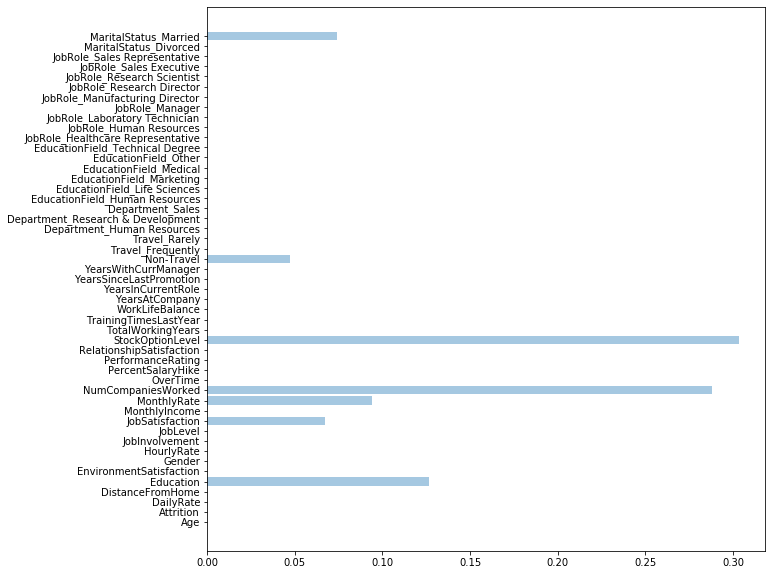

In [23]:
from  sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)
y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = list(df.columns.values)
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)
plt.rcParams["xtick.labelsize"] = 7
 


### PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
X_train.shape

(1102, 49)

In [26]:
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
pca.n_components_

34

In [28]:
scaler = MinMaxScaler()
X_train_reduced = scaler.fit_transform(X_train_pca)
X_test_reduced = scaler.transform(X_test_pca)

### KNN after using PCA (95% Variance)

In [29]:
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

#fit model to data
knn_gscv.fit(X_train_reduced, y_train)

knn_pred = knn_gscv.predict(X_test_reduced)
knn_auc = roc_auc_score(y_test, knn_gscv.best_estimator_.predict_proba(X_test_reduced)[:, 1])

print("Best parameter is {}".format(knn_gscv.best_params_))
print("Best score is {:.4f}".format(knn_gscv.best_score_))
print("AUC for KNN: {:.3f}\n\n".format(knn_auc)) 


conf_matrix=confusion_matrix(y_test,knn_pred)
print("Confusion matrix:\n{}\n\n".format(conf_matrix))

print(classification_report(y_test, knn_pred))

roc_auc_score


Best parameter is {'n_neighbors': 9}
Best score is 0.8466
AUC for KNN: 0.751


Confusion matrix:
[[309   1]
 [ 47  11]]


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       310
           1       0.92      0.19      0.31        58

   micro avg       0.87      0.87      0.87       368
   macro avg       0.89      0.59      0.62       368
weighted avg       0.88      0.87      0.83       368



<function sklearn.metrics.ranking.roc_auc_score(y_true, y_score, average='macro', sample_weight=None, max_fpr=None)>

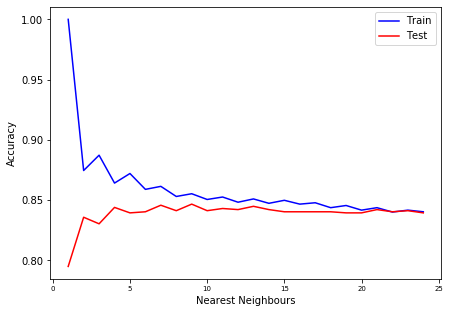

In [30]:
plt.rcParams["figure.figsize"] = (7,5)
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['mean_train_score'], 'b-', label="Train")
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['mean_test_score'],'r-', label="Test")
plt.legend(loc='upper right')
plt.xlabel('Nearest Neighbours')
plt.ylabel('Accuracy')
plt.show()

### Logistic Regression 

In [31]:

lreg1 = LogisticRegression(penalty = 'l1',solver='saga',max_iter = 100000)
lreg2 = LogisticRegression(penalty = 'l2',solver='lbfgs',max_iter = 100000)
param_grid = {'C': (0.01, 0.1, 1, 10, 100)}


lreg_gscv = GridSearchCV(lreg1, param_grid,cv=5, return_train_score=True)
lreg_gscv = GridSearchCV(lreg2, param_grid,cv=5, return_train_score=True)

lreg_gscv.fit(X_train_reduced, y_train)

lreg_pred = lreg_gscv.predict(X_test_reduced)

lreg_auc = roc_auc_score(y_test, lreg_gscv.best_estimator_.predict_proba(X_test_reduced)[:, 1])

print("Best parameter is  {} and penalty' : 'l1'".format(lreg_gscv.best_params_))
print("Best score is {:.4f}".format(lreg_gscv.best_score_))
print("AUC for KNN: {:.3f}\n\n".format(lreg_auc)) 


conf_matrix=confusion_matrix(y_test,lreg_pred)
print("Confusion matrix:\n{}\n\n".format(conf_matrix))

print(classification_report(y_test, lreg_pred))




Best parameter is  {'C': 10} and penalty' : 'l1'
Best score is 0.8793
AUC for KNN: 0.860


Confusion matrix:
[[303   7]
 [ 35  23]]


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.77      0.40      0.52        58

   micro avg       0.89      0.89      0.89       368
   macro avg       0.83      0.69      0.73       368
weighted avg       0.88      0.89      0.87       368



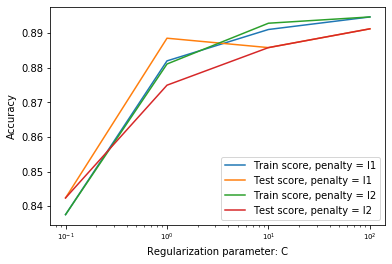

In [32]:
## plotting graph to check for best parameters

c_range = [0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []
for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='saga',max_iter = 10000)
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='lbfgs',max_iter = 10000)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, y_test))
    

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### LinearSVC

In [33]:
lsvc = LinearSVC(max_iter = 100000)
param_grid = {'C' : (0.001, 0.01, 0.1, 1, 10, 100)}

svc_gscv = GridSearchCV(lsvc, param_grid, cv=5, return_train_score=True)
svc_gscv.fit(X_train_reduced, y_train)
svc_pred = svc_gscv.predict(X_test_reduced)


print("Best parameter is {}".format(svc_gscv.best_params_))
print("Best score is {:.4f}".format(svc_gscv.best_score_))


conf_matrix=confusion_matrix(y_test,svc_pred)
print("Confusion matrix:\n{}\n\n".format(conf_matrix))

print(classification_report(y_test, svc_pred))


Best parameter is {'C': 1}
Best score is 0.8766
Confusion matrix:
[[308   2]
 [ 39  19]]


              precision    recall  f1-score   support

           0       0.89      0.99      0.94       310
           1       0.90      0.33      0.48        58

   micro avg       0.89      0.89      0.89       368
   macro avg       0.90      0.66      0.71       368
weighted avg       0.89      0.89      0.87       368



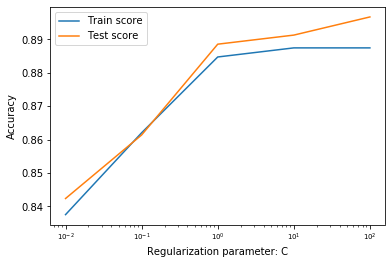

In [34]:
c_range = [0.01,0.1,1,10,100]

train_score = []
test_score = []
for c in c_range:
    lsvc = LinearSVC(C= c, max_iter = 100000)
    lsvc.fit(X_train_reduced,y_train)
    train_score.append(lsvc.score(X_train_reduced, y_train))
    test_score.append(lsvc.score(X_test_reduced, y_test))
    

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### Kernelized SVC

In [35]:
## grid Search

svm = SVC(kernel = 'rbf')
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 10, 100]}

svm_gscv = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

svm_gscv.fit(X_train_reduced, y_train)
svm_pred = svm_gscv.predict(X_test_reduced)

print("Best parameter is {}".format(svm_gscv.best_params_))
print("Best score is {:.4f}".format(svm_gscv.best_score_))

conf_matrix=confusion_matrix(y_test,svm_pred)
print("Confusion matrix:\n{}\n\n".format(conf_matrix))

print(classification_report(y_test, svm_pred))


Best parameter is {'C': 10, 'gamma': 0.1}
Best score is 0.8820
Confusion matrix:
[[307   3]
 [ 37  21]]


              precision    recall  f1-score   support

           0       0.89      0.99      0.94       310
           1       0.88      0.36      0.51        58

   micro avg       0.89      0.89      0.89       368
   macro avg       0.88      0.68      0.73       368
weighted avg       0.89      0.89      0.87       368



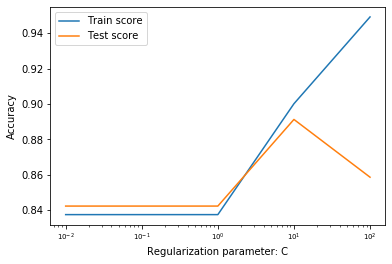

In [36]:
c_range = [0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []
for c in c_range:
        svm = SVC(C=c, gamma = 0.1)
        svm.fit(X_train_reduced,y_train)
        train_score.append(svm.score(X_train_reduced, y_train))
        test_score.append(svm.score(X_test_reduced, y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score, label = 'Train score')
plt.plot(c_range, test_score, label = 'Test score')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')




### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_depth': np.arange(1, 15)}

#use gridsearch to test all values for n_neighbors
dtree_gscv = GridSearchCV(dtree, param_grid, cv=5, return_train_score=True)

#fit model to data
dtree_gscv.fit(X_train_reduced, y_train)
dtree_pred = dtree_gscv.predict(X_test_reduced)

print("Best parameter is {}".format(dtree_gscv.best_params_))
print("Best score is {:.4f}".format(dtree_gscv.best_score_))

conf_matrix=confusion_matrix(y_test,dtree_pred)
print("Confusion matrix:\n{}\n\n".format(conf_matrix))

print(classification_report(y_test, dtree_pred))


Best parameter is {'max_depth': 3}
Best score is 0.8394
Confusion matrix:
[[303   7]
 [ 50   8]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.91       310
           1       0.53      0.14      0.22        58

   micro avg       0.85      0.85      0.85       368
   macro avg       0.70      0.56      0.57       368
weighted avg       0.81      0.85      0.80       368



### Deep learning

In [38]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [39]:
#using grid search to find the optimum number of parameters fro epchos and batch size

np.random.seed(0) # for reproducibility
#from tensorflow.keras.wrappers.sckit_learn import KerasClassifier

# Function to create model, required for KerasRegressor
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile Model
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    return model

base_clf = KerasClassifier(build_fn=create_model, verbose = -1) #return_train_score=True

# grid search epochs, batch size and optimizer

grid_param = {'epochs':[50,100,150],'batch_size':[20,50,100]}
grid = GridSearchCV(estimator=base_clf, param_grid=grid_param)
grid_result = grid.fit(X_train, y_train.values)


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/5

Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64/150
Epoch 65/150
Epoch 66/150
Epoch 67/150
Epoch 68/150
Epoch 69/150
Epoch 70/150
Epoch 71/150
Epoch 72/150
Epoch 73/150
Epoch 74/150
Epoch 75/150
Epoch 76/150
Epoch 77/150
Epoch 78/150
Epoch 79/150
Epoch 80/150
Epoch 81/150
Epoch 82/150
Epoch 83/150
Epoch 84/150
Epoch 85/150
Epoch 86/150
Epoch 87/150
Epoch 88/150
Epoch 89/150
Epoch 90/150
Epoch 91/150
Epoch 92/150
Epoch 93/150
Epoch 94/150
Epoch 95/150
Epoch 96/150
Epoch 97/150
Epoch 98/150
Epoch 99/150
Epoch 100/150
Epoch 101/150
Epoch 102/150
Epoch 103

Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Ep

Epoch 138/150
Epoch 139/150
Epoch 140/150
Epoch 141/150
Epoch 142/150
Epoch 143/150
Epoch 144/150
Epoch 145/150
Epoch 146/150
Epoch 147/150
Epoch 148/150
Epoch 149/150
Epoch 150/150
Epoch 1/150
Epoch 2/150
Epoch 3/150
Epoch 4/150
Epoch 5/150
Epoch 6/150
Epoch 7/150
Epoch 8/150
Epoch 9/150
Epoch 10/150
Epoch 11/150
Epoch 12/150
Epoch 13/150
Epoch 14/150
Epoch 15/150
Epoch 16/150
Epoch 17/150
Epoch 18/150
Epoch 19/150
Epoch 20/150
Epoch 21/150
Epoch 22/150
Epoch 23/150
Epoch 24/150
Epoch 25/150
Epoch 26/150
Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64

In [40]:
print("\nBest parameters : {}".format(grid_result.best_params_))
print("Best score : %0.4f" % (grid_result.best_score_))




Best parameters : {'batch_size': 100, 'epochs': 50}
Best score : 0.8639


In [41]:
# step 1: build the model
np.random.seed(0)

model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
    

In [42]:
# step 2: compile the model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
# step 3: train the model
model.fit(X_train, y_train.values, batch_size= 100, epochs=50)

Epoch 1/50
1102/1102 [==============================] - 1s 519us/sample - loss: 0.6331 - acc: 0.6588
Epoch 2/50
1102/1102 [==============================] - 0s 33us/sample - loss: 0.5819 - acc: 0.7423
Epoch 3/50
1102/1102 [==============================] - 0s 29us/sample - loss: 0.5494 - acc: 0.7849
Epoch 4/50
1102/1102 [==============================] - 0s 25us/sample - loss: 0.5250 - acc: 0.8049
Epoch 5/50
1102/1102 [==============================] - 0s 25us/sample - loss: 0.5035 - acc: 0.8167
Epoch 6/50
1102/1102 [==============================] - 0s 27us/sample - loss: 0.4826 - acc: 0.8258
Epoch 7/50
1102/1102 [==============================] - 0s 27us/sample - loss: 0.4654 - acc: 0.8294
Epoch 8/50
1102/1102 [==============================] - 0s 28us/sample - loss: 0.4521 - acc: 0.8321
Epoch 9/50
1102/1102 [==============================] - 0s 29us/sample - loss: 0.4411 - acc: 0.8339
Epoch 10/50
1102/1102 [==============================] - 0s 28us/sample - loss: 0.4311 - acc: 0.833

In [43]:
# Step 4: Model evaluation


loss_and_metrics = model.evaluate(X_test, y_test.values)

print("Test Loss {:.4f}".format(loss_and_metrics[0]))
print("Test Accuracy {:.4f}".format(loss_and_metrics[1]))

368/368 [==============================] - 0s 932us/sample - loss: 0.3519 - acc: 0.8587
Test Loss 0.3519
Test Accuracy 0.8587


In [44]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test.values)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test.values)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


108032  classified correctly
27392  classified incorrectly


### Comparing results of classification algorithms, with PCA and without PCA

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:

def compare(model):
    clf=model
    score1 = cross_val_score(clf,X_train_reduced,y_train, cv = 5)
    score2 = cross_val_score(clf,X_test_reduced,y_test, cv = 5)
   
  # Calculating Cross validation scores
    
    cv_train.append(np.mean(score1))
    cv_test.append(np.mean(score2))

In [47]:
cv_train=[]
cv_test = []

models=[KNeighborsClassifier(n_neighbors= 9), LogisticRegression(penalty='l1', C = 10,solver='saga',max_iter = 100000), 
        LinearSVC(C = 1,max_iter = 100000),SVC(kernel='rbf',C=10, gamma=0.1), 
        DecisionTreeClassifier(max_depth=3, random_state=0)]
model_names=['KNeighborsClassifier','LogisticRegression','LinearSVC', 'KernelizedSVC','DecisionTree']

for model in range(len(models)):
    compare(models[model])

final_train = [ '%.4f' % elem for elem in cv_train ]
final_test = [ '%.4f' % elem for elem in cv_test ]
d={'Modelling Algo':model_names,'CV Train Score':final_train, 'CV Test Score': final_test}
met_df=pd.DataFrame(d)


In [48]:
result = pd.read_csv('results.csv')

In [49]:
models = result['Algorithms']

p1_train = result['P1_Train']
p1_test = result['P1_Test']

p2_train = result['P2_Train']
p2_test = result['P2_Test']

In [50]:
d1={'Modelling Algo':models,'Project1 Train Score':p1_train, 'Project2 Train Score': p2_train}
train_df=pd.DataFrame(d1)

d2={'Modelling Algo':models,'Project1 Test Score':p1_test, 'Project2 Test Score': p2_test}
test_df=pd.DataFrame(d2)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

def comp_models(model,metric1,metric2):
    plt.rcParams["figure.figsize"] = (10,6)
    if(model == 0): 
        plt.title('\nComparing Train Scores\n', fontdict={'fontsize' : 18})
    if(model == 1): 
        plt.title('\nComparing Test Scores\n', fontdict={'fontsize' : 18})
    plt.plot(models, metric1, label = 'Project1 score')
    plt.plot(models, metric2, label = 'Project2 score')
    plt.legend()
    plt.xlabel('Modelling Algorithms')
    plt.ylabel('Accuracy')
    


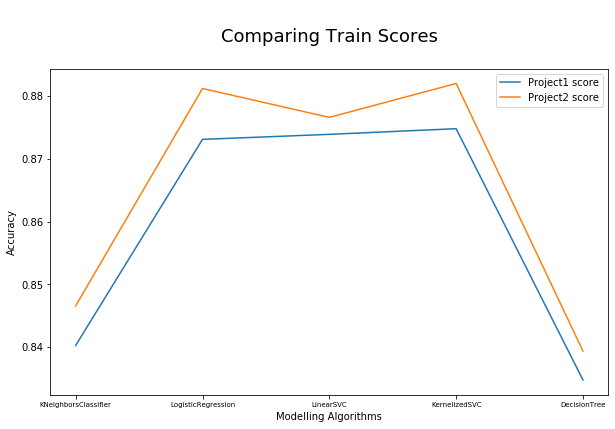

In [52]:
comp_models(0, p1_train, p2_train)

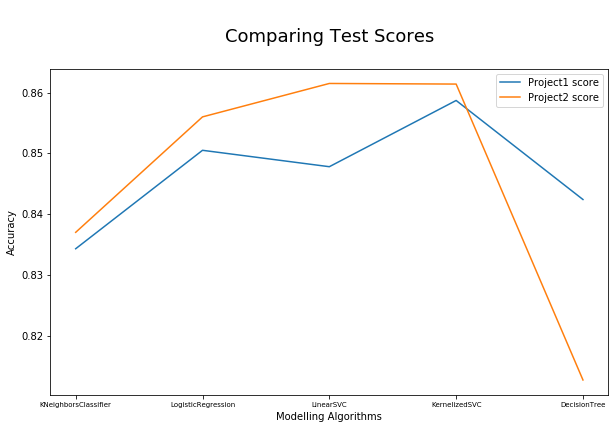

In [53]:
comp_models(1, p1_test, p2_test)

## Classification Interpretations

#### KNN Classifier:	
                         Best Parameters 	  Train CV Score 	Test CV Score 	
    PART 1 :           {'n_neighbors': 7} 	      0.8403 	        0.8343	            
    PART 2(PCA 95%):   {'n_neighbors': 9} 	      0.8466 	        0.8370	            

KNN PCA is performing better


#### Logistic Regression:	
                            Best Parameters 	  Train CV Score 	Test CV Score 	
    PART 1 :           {'penalty' : L1 , 'C': 1} 	  0.8731 	        0.8505	            
    PART 2(PCA 95%):   {'penalty' : L1 , 'C': 10} 	  0.8812 	        0.8560	            
	
    Logistic Regression with PCA is performing better. 


#### Linear_SVM Clasifier:	
                            Best Parameters 	  Train CV Score 	Test CV Score 	
    PART 1 :                  {'C': 0.1} 	         0.8739 	        0.8478	            
    PART 2(PCA 95%):          {'C': 1} 	             0.8766 	        0.8615	            

    Linear_SVM Classifier with PCA is performing better

#### SVC with RBF kernel:

                            Best Parameters 	       Train CV Score 	 Test CV Score 	
    PART 1 :           {'C' : 100 , 'gamma': 0.01} 	      0.8748 	        0.8587	            
    PART 2(PCA 95%):   {'C': 10 , 'gamma' : 0.1} 	      0.8820 	        0.8614	            
	
    SVR with RBF kernel with PCA is performing better

#### Decision Tree Classifier :	

                            Best Parameters 	  Train CV Score 	Test CV Score 	
    PART 1 :               {'max_depth' : 2} 	     0.8348 	        0.8424	            
    PART 2(PCA 95%):       {'max_depth' : 3} 	     0.8394 	        0.8127	            
	
                  
Decision Tree Classifier without PCA is performing better. It gives a better Cross-Validation score and the difference in the Train and test score is less


### Thank You!